This is a Machine Learning technique using several classification algorithms to classify and predict the loans that are likely to become non-performing based on previous loans performance. The dataset contains loans from several financial institutions in Nigeria.
The datasets have already been split into train and test sets.

>>> Steps by step approach 

** Set up the libraries 
** Exploratory Analysis of the dataset 
** Prepare and clean the data 
** Employ various classification alogorithms 
** Evaluate model predictive performance and accuracy  

## Import relevant libraries and dataset 

In [187]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [188]:
tr_dg = pd.read_csv("loan/traindemographics.csv")
tr_perf = pd.read_csv("loan/trainperf.csv")
tr_prevloan = pd.read_csv("loan/trainprevloans.csv")
test_dg= pd.read_csv("loan/testdemographics.csv")
test_perf= pd.read_csv("loan/testperf.csv")
test_prevloan= pd.read_csv("loan/testprevloans.csv")


In [189]:
tr_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [190]:
tr_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [191]:
tr_prevloan.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [192]:
test_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


In [193]:
test_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


In [194]:
test_prevloan.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000


## Dataset Cleaing 

In [195]:
# Drop the date fields and referredby in the loan performance files
test_perf= test_perf.drop(["creationdate","approveddate","referredby"], axis= 1,errors='ignore')
tr_perf= tr_perf.drop(["referredby"], axis= 1, errors='ignore')

In [196]:
test_perf.head()
#tr_perf.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30


In [197]:
# merging the date features from other csv files into the train performance file
train_bank= pd.merge(tr_perf, tr_prevloan["firstduedate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, tr_prevloan["closeddate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, tr_prevloan["firstrepaiddate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, tr_dg["birthdate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, tr_dg["longitude_gps"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, tr_dg["latitude_gps"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, tr_dg["employment_status_clients"], left_index= True, right_index= True)

In [198]:
train_bank.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,firstduedate,closeddate,firstrepaiddate,birthdate,longitude_gps,latitude_gps,employment_status_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,2016-09-14 00:00:00.000000,2016-09-01 16:06:48.000000,2016-09-01 15:51:43.000000,1973-10-10 00:00:00.000000,3.319219,6.528604,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,2017-05-30 00:00:00.000000,2017-05-28 14:44:49.000000,2017-05-26 00:00:00.000000,1986-01-21 00:00:00.000000,3.325598,7.119403,Permanent
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,2017-04-04 00:00:00.000000,2017-04-26 22:18:56.000000,2017-04-26 22:03:47.000000,1987-04-01 00:00:00.000000,5.746100,5.563174,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,2017-04-24 00:00:00.000000,2017-04-24 01:35:52.000000,2017-04-24 00:48:43.000000,1991-07-19 00:00:00.000000,3.362850,6.642485,Permanent
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,2017-07-03 00:00:00.000000,2017-07-14 21:18:43.000000,2017-07-14 21:08:35.000000,1982-11-22 00:00:00.000000,8.455332,11.971410,Permanent


In [199]:
# merging the date features from other csv files into the test performance file
test_bank= pd.merge(test_perf, test_prevloan["firstduedate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_prevloan["closeddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_prevloan["firstrepaiddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_prevloan["creationdate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_prevloan["approveddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["birthdate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["longitude_gps"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["latitude_gps"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["employment_status_clients"], left_index= True, right_index= True)

In [200]:
test_bank.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,firstduedate,closeddate,firstrepaiddate,creationdate,approveddate,birthdate,longitude_gps,latitude_gps,employment_status_clients
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,2016-06-16 00:00:00.000000,2016-06-17 00:04:15.000000,2016-06-16 15:44:08.000000,2016-05-17 09:36:55.000000,2016-05-17 10:37:00.000000,1976-08-28 00:00:00.000000,5.296628,7.593965,Permanent
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,2017-03-06 00:00:00.000000,2017-03-02 16:22:58.000000,2017-03-02 16:07:47.000000,2017-02-04 20:28:52.000000,2017-02-04 21:28:59.000000,1978-06-23 00:00:00.000000,3.294513,6.596602,Permanent
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,2017-04-03 00:00:00.000000,2017-04-02 00:44:24.000000,2017-04-01 21:29:46.000000,2017-03-04 09:28:16.000000,2017-03-04 10:28:22.000000,1984-04-04 00:00:00.000000,8.501912,7.729364,Permanent
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30,2016-07-04 00:00:00.000000,2016-07-04 11:34:04.000000,2016-07-04 11:19:01.000000,2016-06-02 13:27:08.000000,2016-06-02 14:27:14.000000,1983-05-28 00:00:00.000000,3.318904,6.681595,Permanent
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30,2016-05-31 00:00:00.000000,2016-06-02 00:02:58.000000,2016-06-01 15:22:34.000000,2016-05-16 08:13:04.000000,2016-05-16 09:13:12.000000,1982-03-29 00:00:00.000000,6.354624,4.949031,Self-Employed


In [201]:
train_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4345
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 4346 non-null   object 
 1   systemloanid               4346 non-null   int64  
 2   loannumber                 4346 non-null   int64  
 3   approveddate               4346 non-null   object 
 4   creationdate               4346 non-null   object 
 5   loanamount                 4346 non-null   float64
 6   totaldue                   4346 non-null   float64
 7   termdays                   4346 non-null   int64  
 8   good_bad_flag              4346 non-null   object 
 9   firstduedate               4346 non-null   object 
 10  closeddate                 4346 non-null   object 
 11  firstrepaiddate            4346 non-null   object 
 12  birthdate                  4346 non-null   object 
 13  longitude_gps              4346 non-null   float

In [202]:
test_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 1450 non-null   object 
 1   systemloanid               1450 non-null   int64  
 2   loannumber                 1450 non-null   int64  
 3   loanamount                 1450 non-null   int64  
 4   totaldue                   1450 non-null   float64
 5   termdays                   1450 non-null   int64  
 6   firstduedate               1450 non-null   object 
 7   closeddate                 1450 non-null   object 
 8   firstrepaiddate            1450 non-null   object 
 9   creationdate               1450 non-null   object 
 10  approveddate               1450 non-null   object 
 11  birthdate                  1450 non-null   object 
 12  longitude_gps              1450 non-null   float64
 13  latitude_gps               1450 non-null   float

In [203]:
train_bank.isnull().sum()

customerid                     0
systemloanid                   0
loannumber                     0
approveddate                   0
creationdate                   0
loanamount                     0
totaldue                       0
termdays                       0
good_bad_flag                  0
firstduedate                   0
closeddate                     0
firstrepaiddate                0
birthdate                      0
longitude_gps                  0
latitude_gps                   0
employment_status_clients    648
dtype: int64

In [204]:
test_bank.isnull().sum()

customerid                     0
systemloanid                   0
loannumber                     0
loanamount                     0
totaldue                       0
termdays                       0
firstduedate                   0
closeddate                     0
firstrepaiddate                0
creationdate                   0
approveddate                   0
birthdate                      0
longitude_gps                  0
latitude_gps                   0
employment_status_clients    211
dtype: int64

In [205]:
test_bank.fillna("other")
train_bank.fillna("other")

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,firstduedate,closeddate,firstrepaiddate,birthdate,longitude_gps,latitude_gps,employment_status_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,2016-09-14 00:00:00.000000,2016-09-01 16:06:48.000000,2016-09-01 15:51:43.000000,1973-10-10 00:00:00.000000,3.319219,6.528604,other
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,2017-05-30 00:00:00.000000,2017-05-28 14:44:49.000000,2017-05-26 00:00:00.000000,1986-01-21 00:00:00.000000,3.325598,7.119403,Permanent
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,2017-04-04 00:00:00.000000,2017-04-26 22:18:56.000000,2017-04-26 22:03:47.000000,1987-04-01 00:00:00.000000,5.746100,5.563174,other
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,2017-04-24 00:00:00.000000,2017-04-24 01:35:52.000000,2017-04-24 00:48:43.000000,1991-07-19 00:00:00.000000,3.362850,6.642485,Permanent
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,2017-07-03 00:00:00.000000,2017-07-14 21:18:43.000000,2017-07-14 21:08:35.000000,1982-11-22 00:00:00.000000,8.455332,11.971410,Permanent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,2017-07-28 12:00:25.000000,2017-07-28 11:00:18.000000,20000.0,24500.0,30,Good,2017-04-04 00:00:00.000000,2017-04-02 20:09:20.000000,2017-04-02 19:54:11.000000,1985-12-13 00:00:00.000000,3.236753,7.030168,Permanent
4342,8a858f735aec46c4015af026256357b8,301999973,5,2017-07-28 07:58:26.000000,2017-07-28 06:57:16.000000,20000.0,24500.0,30,Good,2017-07-10 00:00:00.000000,2017-07-10 15:52:41.000000,2017-07-10 15:42:32.000000,1982-07-01 00:00:00.000000,7.013749,4.875662,other
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,2017-07-15 13:35:01.000000,2017-07-15 12:34:53.000000,10000.0,11500.0,15,Good,2017-02-03 00:00:00.000000,2017-02-02 09:11:42.000000,2017-02-02 08:56:32.000000,1989-09-26 00:00:00.000000,6.295530,7.092508,Permanent
4344,8a858f8658c206a90158d0c447863597,301988349,8,2017-07-20 21:20:00.000000,2017-07-20 20:19:53.000000,30000.0,34500.0,30,Good,2017-06-22 00:00:00.000000,2017-07-07 14:57:38.000000,2017-06-28 19:18:40.000000,1985-09-06 00:00:00.000000,3.354206,6.539070,Permanent


In [17]:
#percentage of good and bad 
train_bank.good_bad_flag.value_counts(normalize= True) *100

Good    78.301887
Bad     21.698113
Name: good_bad_flag, dtype: float64

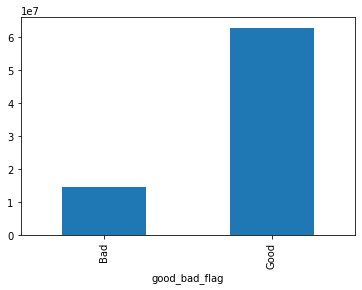

In [18]:
hist_perf=train_bank.groupby('good_bad_flag').sum()
hist_perf['loanamount'].plot.bar()

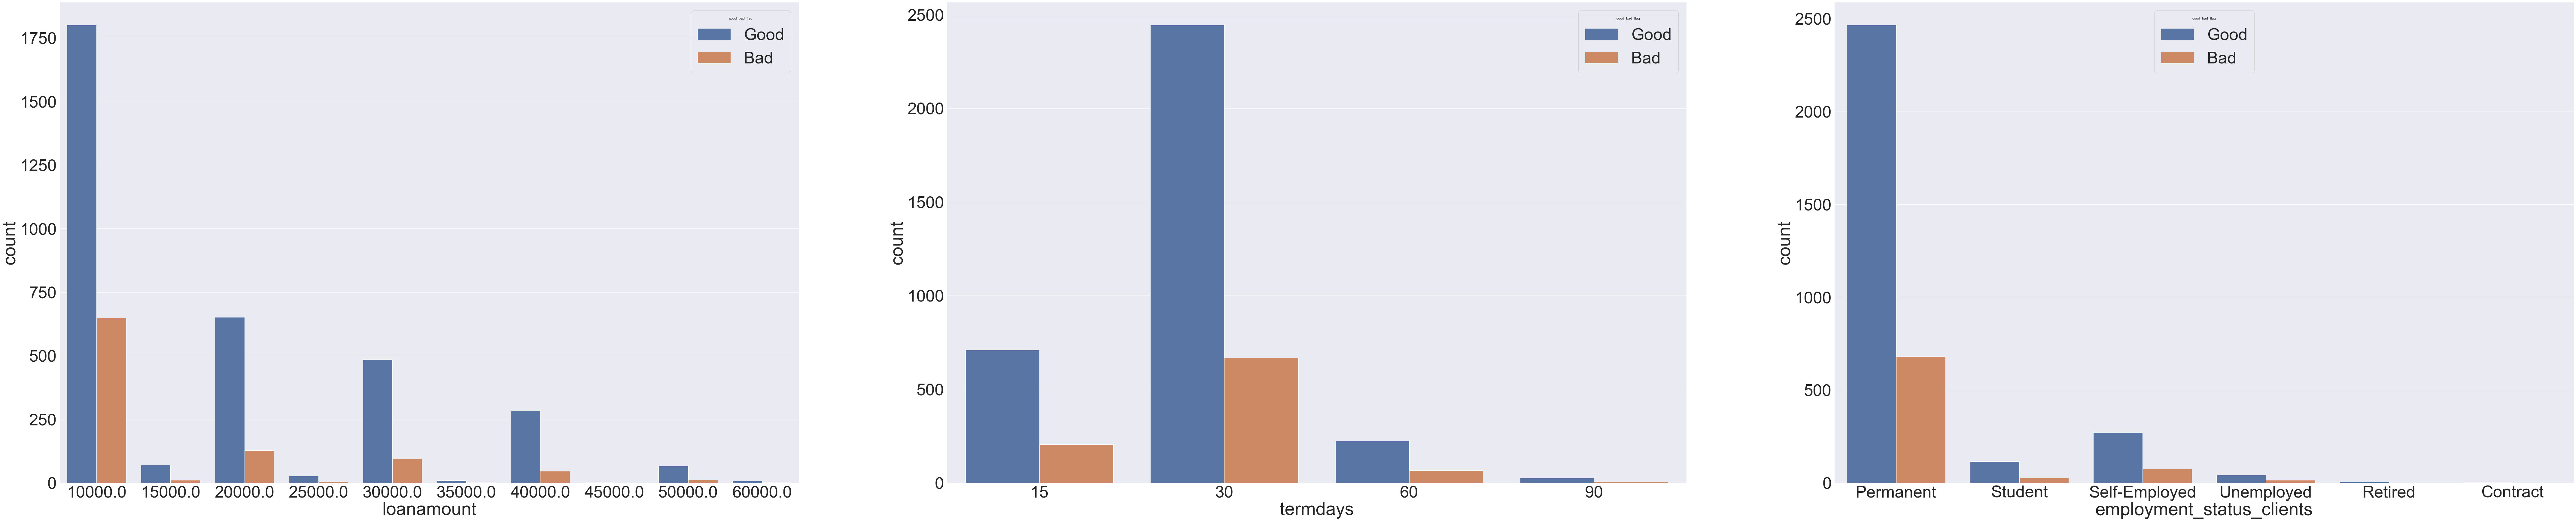

In [212]:
plt.figure(figsize = (150, 100))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(train_bank['loanamount'],hue=train_bank['good_bad_flag'])

plt.subplot(332)
sns.countplot(train_bank['termdays'],hue=train_bank['good_bad_flag'])


plt.subplot(333)
sns.countplot(train_bank['employment_status_clients'],hue=train_bank['good_bad_flag'])


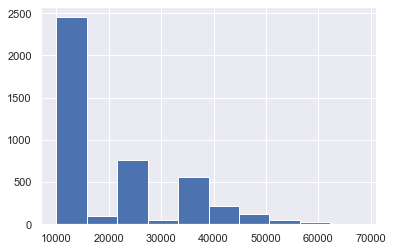

In [52]:
plt.hist(train_bank['totaldue'])
plt.show()

In [213]:
#statistics
train_bank.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000
mean,3.019810e+08,5.169581,17801.426599,21250.540888,29.271744,4.626189,7.251356
std,1.342529e+04,3.650181,10745.166507,11941.240232,11.533411,7.184832,3.055052
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019692e+08,2.000000,10000.000000,13000.000000,30.000000,3.354953,6.470610
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.593302,6.621888
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.545220,7.425052
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


In [214]:
#Using the module datetime on the date features for easy extraction
train_bank["birthdate"]= pd.to_datetime(train_bank["birthdate"])
train_bank["approveddate"]= pd.to_datetime(train_bank["approveddate"])
train_bank["creationdate"]= pd.to_datetime(train_bank["creationdate"])
train_bank["firstduedate"]= pd.to_datetime(train_bank["firstduedate"])
train_bank["firstrepaiddate"]= pd.to_datetime(train_bank["firstrepaiddate"])
train_bank["closeddate"]= pd.to_datetime(train_bank["firstrepaiddate"])

test_bank["birthdate"]= pd.to_datetime(test_bank["birthdate"])
test_bank["approveddate"]= pd.to_datetime(test_bank["approveddate"])
test_bank["creationdate"]= pd.to_datetime(test_bank["creationdate"])
test_bank["firstduedate"]= pd.to_datetime(test_bank["firstduedate"])
test_bank["firstrepaiddate"]= pd.to_datetime(test_bank["firstrepaiddate"])
test_bank["closeddate"]= pd.to_datetime(test_bank["closeddate"])
train_bank.dtypes

customerid                           object
systemloanid                          int64
loannumber                            int64
approveddate                 datetime64[ns]
creationdate                 datetime64[ns]
loanamount                          float64
totaldue                            float64
termdays                              int64
good_bad_flag                        object
firstduedate                 datetime64[ns]
closeddate                   datetime64[ns]
firstrepaiddate              datetime64[ns]
birthdate                    datetime64[ns]
longitude_gps                       float64
latitude_gps                        float64
employment_status_clients            object
dtype: object

In [215]:
#convert the date features to time in seconds
from datetime import datetime
train_bank["birth"]= [datetime.timestamp(i) for i in train_bank.birthdate]
train_bank["approved"]= [datetime.timestamp(i) for i in train_bank.approveddate]
train_bank["creation"]= [datetime.timestamp(i) for i in train_bank.creationdate]
train_bank["duedate"]= [datetime.timestamp(i) for i in train_bank.firstduedate]
train_bank["repaiddate"]= [datetime.timestamp(i) for i in train_bank.firstrepaiddate]
train_bank["closed"]= [datetime.timestamp(i) for i in train_bank.closeddate]
train_bank
 


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,firstduedate,...,birthdate,longitude_gps,latitude_gps,employment_status_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,2016-09-14,...,1973-10-10,3.319219,6.528604,NaN,119073600.0,1.500985e+09,1.500982e+09,1.473826e+09,1.472760e+09,1.472760e+09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,2017-05-30,...,1986-01-21,3.325598,7.119403,Permanent,506667600.0,1.499289e+09,1.499285e+09,1.496117e+09,1.495771e+09,1.495771e+09
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2017-04-04,...,1987-04-01,5.746100,5.563174,NaN,544251600.0,1.499367e+09,1.499364e+09,1.491278e+09,1.493259e+09,1.493259e+09
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,2017-04-24,...,1991-07-19,3.362850,6.642485,Permanent,679896000.0,1.501196e+09,1.501193e+09,1.493006e+09,1.493009e+09,1.493009e+09
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,2017-07-03,...,1982-11-22,8.455332,11.971410,Permanent,406789200.0,1.499140e+09,1.499136e+09,1.499054e+09,1.500081e+09,1.500081e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,2017-07-28 12:00:25,2017-07-28 11:00:18,20000.0,24500.0,30,Good,2017-04-04,...,1985-12-13,3.236753,7.030168,Permanent,503298000.0,1.501258e+09,1.501254e+09,1.491278e+09,1.491177e+09,1.491177e+09
4342,8a858f735aec46c4015af026256357b8,301999973,5,2017-07-28 07:58:26,2017-07-28 06:57:16,20000.0,24500.0,30,Good,2017-07-10,...,1982-07-01,7.013749,4.875662,NaN,394344000.0,1.501243e+09,1.501239e+09,1.499659e+09,1.499716e+09,1.499716e+09
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,2017-07-15 13:35:01,2017-07-15 12:34:53,10000.0,11500.0,15,Good,2017-02-03,...,1989-09-26,6.295530,7.092508,Permanent,622785600.0,1.500140e+09,1.500136e+09,1.486098e+09,1.486044e+09,1.486044e+09
4344,8a858f8658c206a90158d0c447863597,301988349,8,2017-07-20 21:20:00,2017-07-20 20:19:53,30000.0,34500.0,30,Good,2017-06-22,...,1985-09-06,3.354206,6.539070,Permanent,494827200.0,1.500600e+09,1.500596e+09,1.498104e+09,1.498692e+09,1.498692e+09


In [216]:
test_bank["birth"]= [datetime.timestamp(i) for i in test_bank.birthdate]
test_bank["approved"]= [datetime.timestamp(i) for i in test_bank.approveddate]
test_bank["creation"] = [datetime.timestamp(i) for i in test_bank.creationdate]
test_bank["duedate"] = [datetime.timestamp(i) for i in test_bank.firstduedate]
test_bank["repaiddate"]= [datetime.timestamp(i) for i in test_bank.firstrepaiddate]
test_bank["closed"]= [datetime.timestamp(i) for i in test_bank.closeddate]
test_bank

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,firstduedate,closeddate,firstrepaiddate,creationdate,...,birthdate,longitude_gps,latitude_gps,employment_status_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,2016-06-16,2016-06-17 00:04:15,2016-06-16 15:44:08,2016-05-17 09:36:55,...,1976-08-28,5.296628,7.593965,Permanent,210052800.0,1.463496e+09,1.463492e+09,1.466050e+09,1.466106e+09,1.466136e+09
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,2017-03-06,2017-03-02 16:22:58,2017-03-02 16:07:47,2017-02-04 20:28:52,...,1978-06-23,3.294513,6.596602,Permanent,267422400.0,1.486262e+09,1.486258e+09,1.488776e+09,1.488489e+09,1.488490e+09
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,2017-04-03,2017-04-02 00:44:24,2017-04-01 21:29:46,2017-03-04 09:28:16,...,1984-04-04,8.501912,7.729364,Permanent,449902800.0,1.488641e+09,1.488638e+09,1.491192e+09,1.491097e+09,1.491108e+09
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30,2016-07-04,2016-07-04 11:34:04,2016-07-04 11:19:01,2016-06-02 13:27:08,...,1983-05-28,3.318904,6.681595,Permanent,422942400.0,1.464892e+09,1.464888e+09,1.467605e+09,1.467646e+09,1.467646e+09
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30,2016-05-31,2016-06-02 00:02:58,2016-06-01 15:22:34,2016-05-16 08:13:04,...,1982-03-29,6.354624,4.949031,Self-Employed,386226000.0,1.463404e+09,1.463401e+09,1.464667e+09,1.464809e+09,1.464840e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,10000,11500.0,15,2017-04-24,2017-05-24 15:49:31,2017-04-25 10:28:06,2017-03-24 17:27:29,...,1980-08-05,3.583009,6.493201,NaN,334296000.0,1.490394e+09,1.490391e+09,1.493006e+09,1.493130e+09,1.495655e+09
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,10000,13000.0,30,2017-07-10,2017-07-08 05:10:32,2017-07-08 05:00:21,2017-06-08 16:02:26,...,1994-02-25,3.838206,7.352298,Student,762152400.0,1.496956e+09,1.496952e+09,1.499659e+09,1.499504e+09,1.499505e+09
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,40000,48000.0,60,2017-04-19,2017-04-05 22:22:44,2017-04-05 22:07:36,2017-04-03 18:48:30,...,1978-07-30,3.448487,6.435382,Permanent,270619200.0,1.491263e+09,1.491260e+09,1.492574e+09,1.491444e+09,1.491445e+09
1448,8a858e10570f2d65015717fcfec44996,301961483,14,60000,68100.0,90,2017-07-07,2017-07-03 15:33:59,2017-07-03 15:23:50,2017-06-07 12:11:10,...,1992-04-02,7.036701,4.781278,Permanent,702190800.0,1.496856e+09,1.496852e+09,1.499400e+09,1.499110e+09,1.499110e+09


In [217]:
#Drop the old date related columns 
train_bank= train_bank.drop(["birthdate","creationdate","approveddate","firstduedate","firstrepaiddate","closeddate"], axis= 1)
test_bank= test_bank.drop(["birthdate","creationdate","approveddate","firstduedate","firstrepaiddate","closeddate"], axis= 1)


In [218]:
train_bank.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,employment_status_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,3.319219,6.528604,NaN,119073600.0,1.500985e+09,1.500982e+09,1.473826e+09,1.472760e+09,1.472760e+09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,17250.0,30,Good,3.325598,7.119403,Permanent,506667600.0,1.499289e+09,1.499285e+09,1.496117e+09,1.495771e+09,1.495771e+09
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,22250.0,15,Good,5.746100,5.563174,NaN,544251600.0,1.499367e+09,1.499364e+09,1.491278e+09,1.493259e+09,1.493259e+09
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,11500.0,15,Good,3.362850,6.642485,Permanent,679896000.0,1.501196e+09,1.501193e+09,1.493006e+09,1.493009e+09,1.493009e+09
4,8a858970548359cc0154883481981866,301962360,9,40000.0,44000.0,30,Good,8.455332,11.971410,Permanent,406789200.0,1.499140e+09,1.499136e+09,1.499054e+09,1.500081e+09,1.500081e+09


In [219]:
test_bank.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps,employment_status_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,5.296628,7.593965,Permanent,210052800.0,1.463496e+09,1.463492e+09,1.466050e+09,1.466106e+09,1.466136e+09
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,3.294513,6.596602,Permanent,267422400.0,1.486262e+09,1.486258e+09,1.488776e+09,1.488489e+09,1.488490e+09
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,8.501912,7.729364,Permanent,449902800.0,1.488641e+09,1.488638e+09,1.491192e+09,1.491097e+09,1.491108e+09
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30,3.318904,6.681595,Permanent,422942400.0,1.464892e+09,1.464888e+09,1.467605e+09,1.467646e+09,1.467646e+09
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30,6.354624,4.949031,Self-Employed,386226000.0,1.463404e+09,1.463401e+09,1.464667e+09,1.464809e+09,1.464840e+09


In [220]:
#create new features from the difference of when the loan is created and approved
first_date= train_bank["creation"]
second_date= train_bank["approved"]
train_bank["time_diff"]= first_date - second_date
train_bank["time_diff"].head()


0   -3609.0
1   -3623.0
2   -3606.0
3   -3606.0
4   -3606.0
Name: time_diff, dtype: float64

In [221]:
first_date1= test_bank["creation"]
second_date1= test_bank["approved"]
test_bank["time_diff"]= first_date1 - second_date1
test_bank["time_diff"].head()

0   -3605.0
1   -3607.0
2   -3606.0
3   -3606.0
4   -3608.0
Name: time_diff, dtype: float64

In [222]:
train_new= train_bank.drop(["customerid"],axis= 1)

In [223]:
train_new

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,employment_status_clients,birth,approved,creation,duedate,repaiddate,closed,time_diff
0,301994762,12,30000.0,34500.0,30,Good,3.319219,6.528604,NaN,119073600.0,1.500985e+09,1.500982e+09,1.473826e+09,1.472760e+09,1.472760e+09,-3609.0
1,301965204,2,15000.0,17250.0,30,Good,3.325598,7.119403,Permanent,506667600.0,1.499289e+09,1.499285e+09,1.496117e+09,1.495771e+09,1.495771e+09,-3623.0
2,301966580,7,20000.0,22250.0,15,Good,5.746100,5.563174,NaN,544251600.0,1.499367e+09,1.499364e+09,1.491278e+09,1.493259e+09,1.493259e+09,-3606.0
3,301999343,3,10000.0,11500.0,15,Good,3.362850,6.642485,Permanent,679896000.0,1.501196e+09,1.501193e+09,1.493006e+09,1.493009e+09,1.493009e+09,-3606.0
4,301962360,9,40000.0,44000.0,30,Good,8.455332,11.971410,Permanent,406789200.0,1.499140e+09,1.499136e+09,1.499054e+09,1.500081e+09,1.500081e+09,-3606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,302000403,7,20000.0,24500.0,30,Good,3.236753,7.030168,Permanent,503298000.0,1.501258e+09,1.501254e+09,1.491278e+09,1.491177e+09,1.491177e+09,-3607.0
4342,301999973,5,20000.0,24500.0,30,Good,7.013749,4.875662,NaN,394344000.0,1.501243e+09,1.501239e+09,1.499659e+09,1.499716e+09,1.499716e+09,-3670.0
4343,301979154,3,10000.0,11500.0,15,Good,6.295530,7.092508,Permanent,622785600.0,1.500140e+09,1.500136e+09,1.486098e+09,1.486044e+09,1.486044e+09,-3608.0
4344,301988349,8,30000.0,34500.0,30,Good,3.354206,6.539070,Permanent,494827200.0,1.500600e+09,1.500596e+09,1.498104e+09,1.498692e+09,1.498692e+09,-3607.0


In [232]:
categorical_columns = ["employment_status_clients"]
dummy_df = pd.get_dummies(train_new[categorical_columns])
train_new1 = pd.concat([train_new, dummy_df], axis=1)
train_new1 = train_new1.drop(categorical_columns, axis=1)

In [233]:
train_new1.head()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,birth,approved,...,duedate,repaiddate,closed,time_diff,employment_status_clients_Contract,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed
0,301994762,12,30000.0,34500.0,30,Good,3.319219,6.528604,119073600.0,1.500985e+09,...,1.473826e+09,1.472760e+09,1.472760e+09,-3609.0,0,0,0,0,0,0
1,301965204,2,15000.0,17250.0,30,Good,3.325598,7.119403,506667600.0,1.499289e+09,...,1.496117e+09,1.495771e+09,1.495771e+09,-3623.0,0,1,0,0,0,0
2,301966580,7,20000.0,22250.0,15,Good,5.746100,5.563174,544251600.0,1.499367e+09,...,1.491278e+09,1.493259e+09,1.493259e+09,-3606.0,0,0,0,0,0,0
3,301999343,3,10000.0,11500.0,15,Good,3.362850,6.642485,679896000.0,1.501196e+09,...,1.493006e+09,1.493009e+09,1.493009e+09,-3606.0,0,1,0,0,0,0
4,301962360,9,40000.0,44000.0,30,Good,8.455332,11.971410,406789200.0,1.499140e+09,...,1.499054e+09,1.500081e+09,1.500081e+09,-3606.0,0,1,0,0,0,0


## Modeling

In [234]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, metrics, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

X= train_new1.drop("good_bad_flag", axis= 1)
y= train_new1.good_bad_flag

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

In [235]:
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
lr_predictproba = clf_lr.predict_proba(X_test)

In [236]:
print('Model Scores')
print(clf_lr.score (X_test, y_test), 'Logistic Regression')

Model Scores
0.7597701149425288 Logistic Regression


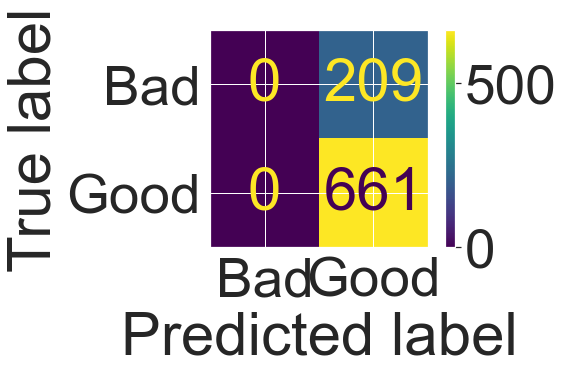

In [238]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=clf_lr.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=clf_lr.classes_)
disp.plot()

In [251]:
#Random Forest Model
clf_rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=2, random_state=42).fit(X_train, y_train)

In [252]:
print('Model Scores')
print(clf_lr.score (X_test, y_test), 'Logistic Regression')
print(clf_rf.score (X_test, y_test), 'Random Forest')

Model Scores
0.7597701149425288 Logistic Regression
0.7632183908045977 Random Forest


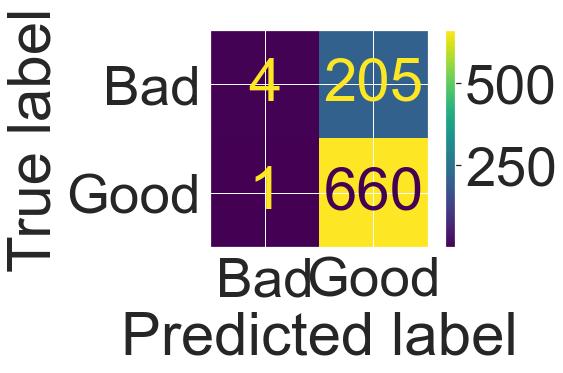

In [254]:
y_pred_rf = clf_rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=clf_rf.classes_)
disp.plot()

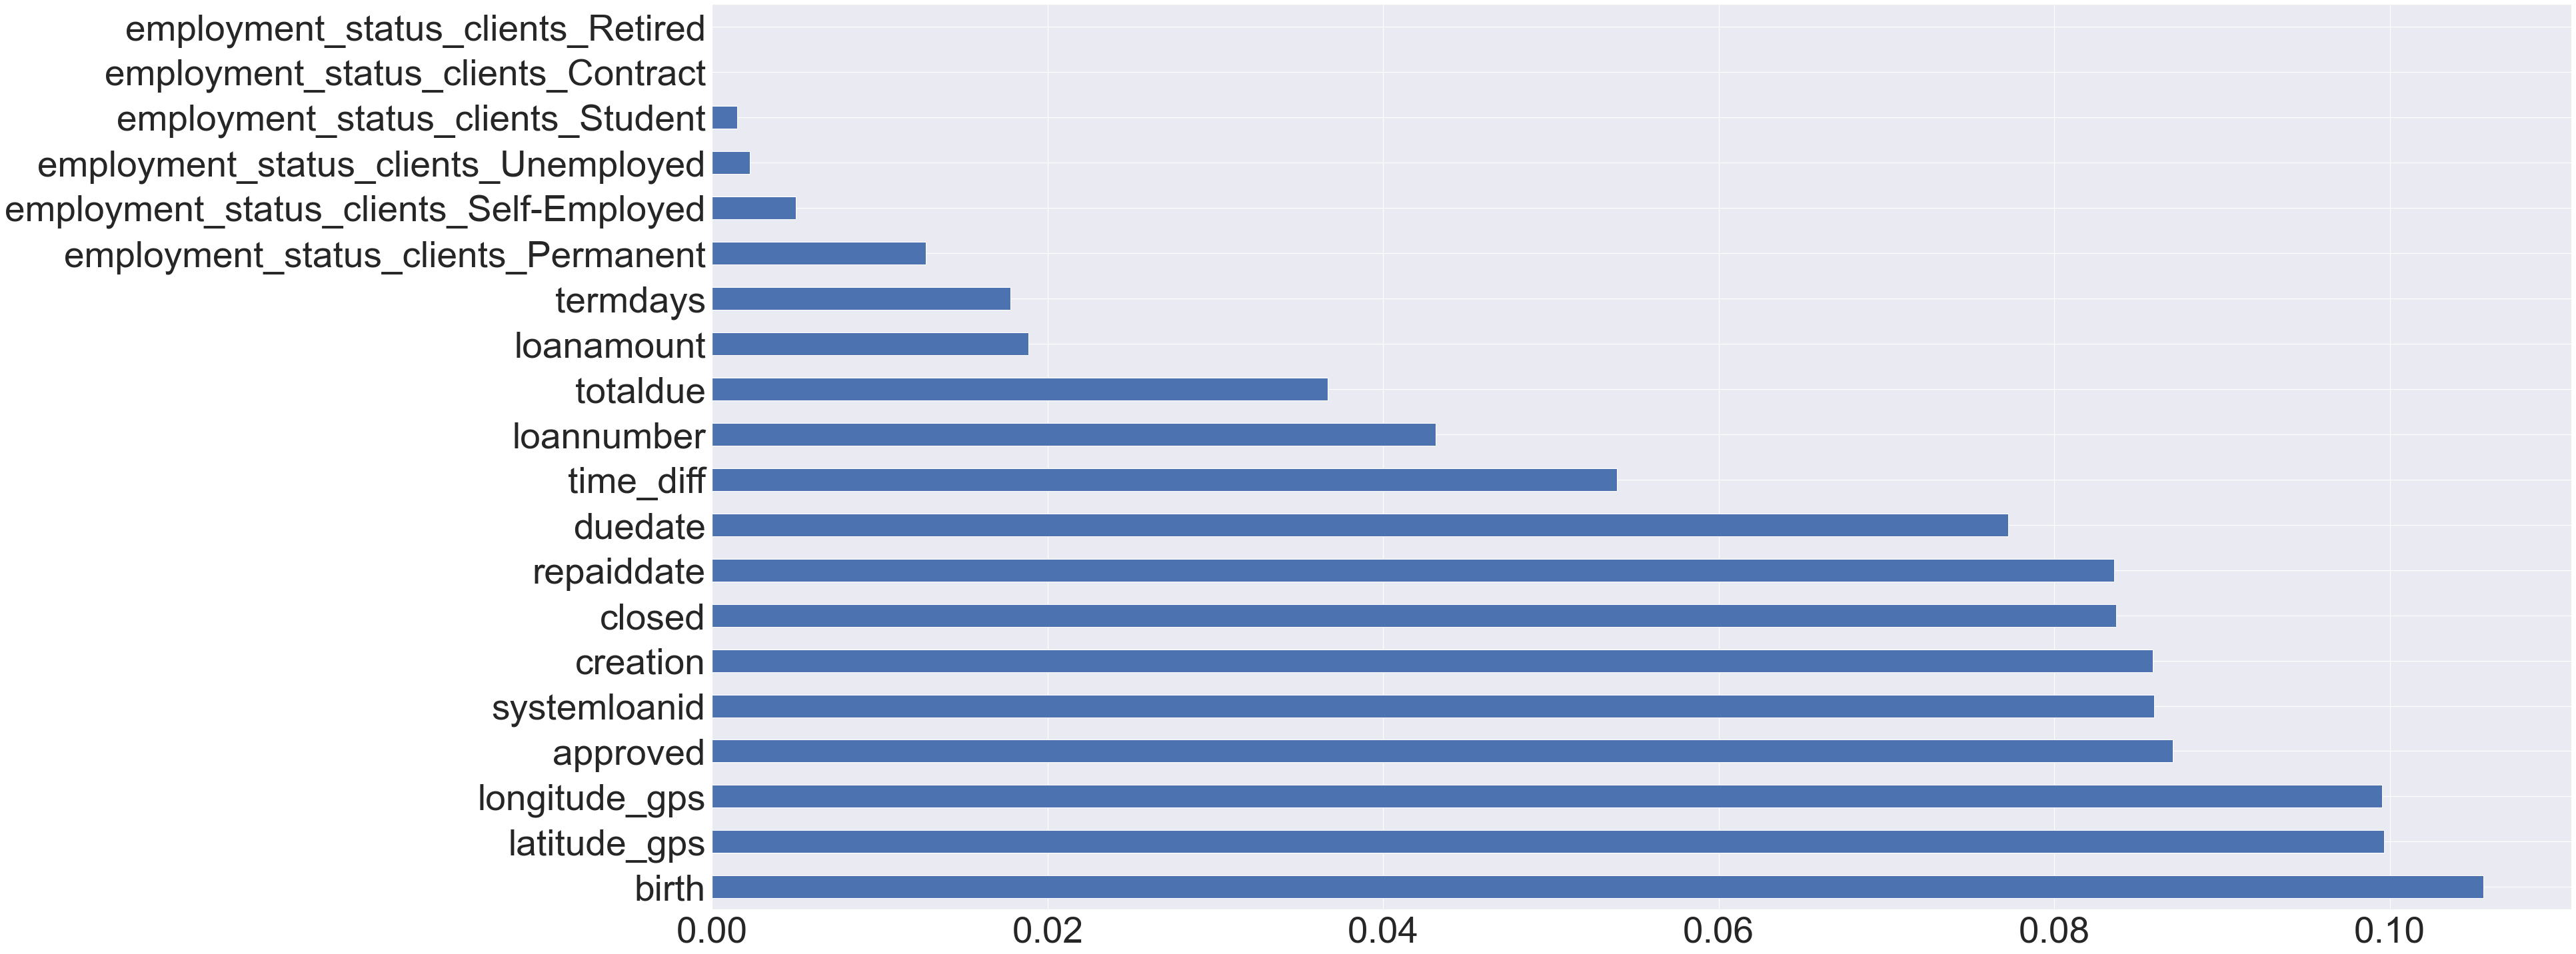

In [260]:
plt.figure(figsize=(50,25))
feat_importances = pd.Series(clf_rf.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [261]:
#Decision Tree Model
clf_dt = tree.DecisionTreeClassifier(max_depth=5)

In [262]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.7459770114942529

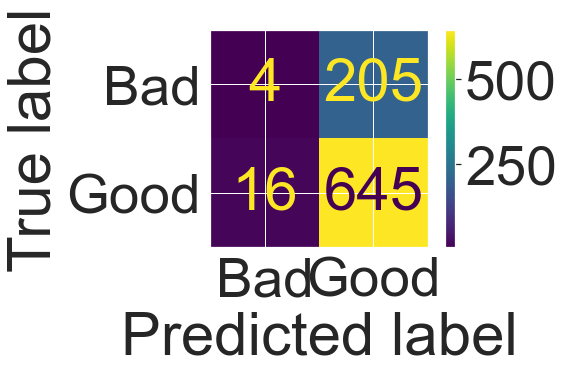

In [266]:
y_pred_dt = clf_dt.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_dt, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=clf_dt.classes_)
disp.plot()

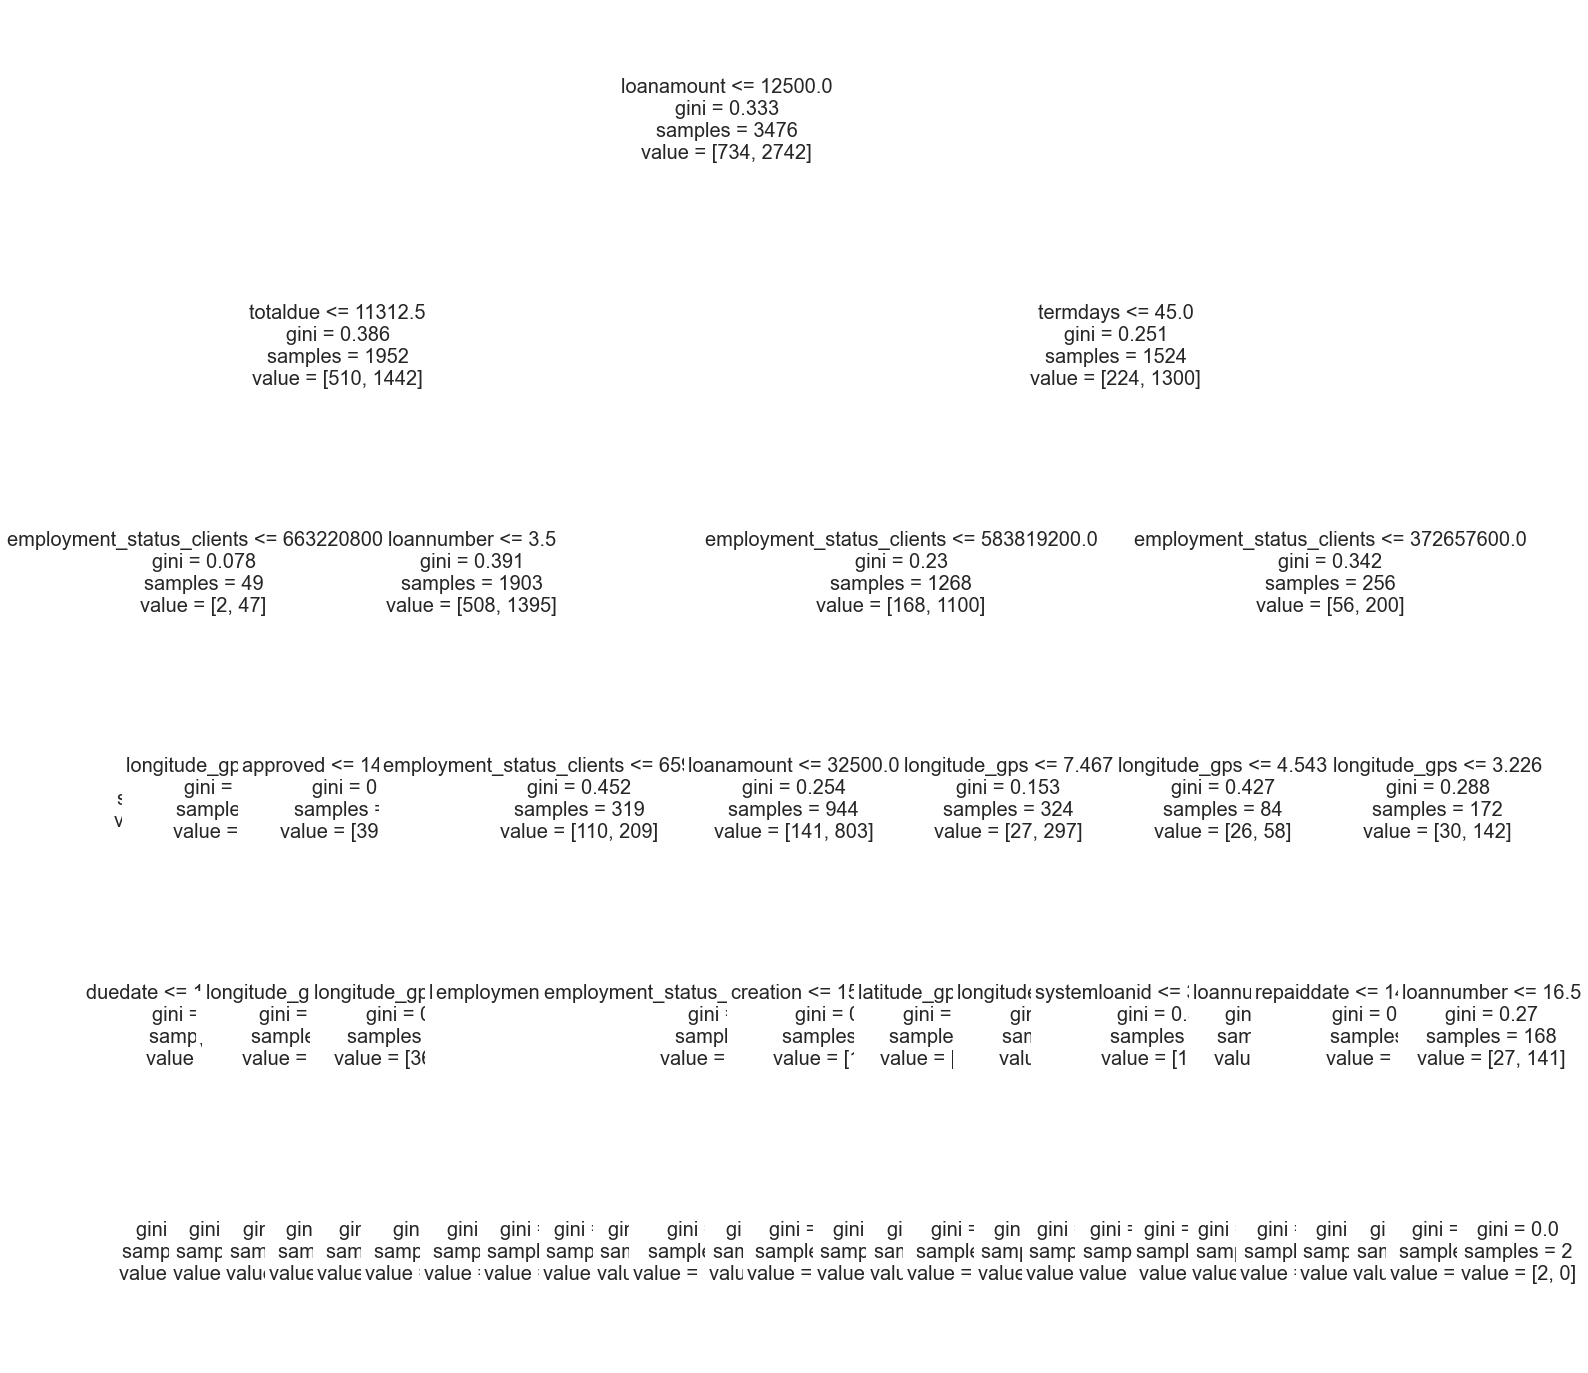

In [263]:
plt.figure(figsize=(25,25))
tree.plot_tree(clf_dt, fontsize=20, feature_names= list(train_new.drop(['good_bad_flag'], axis=1)))
plt.show()

In [268]:
print('Model Scores')
print(clf_lr.score (X_test, y_test), 'Logistic Regression')
print(clf_rf.score (X_test, y_test), 'Random Forest')
print(clf_dt.score (X_test, y_test), 'Decision Tree')

Model Scores
0.7597701149425288 Logistic Regression
0.7632183908045977 Random Forest
0.7459770114942529 Decision Tree


In [267]:
from sklearn.metrics import classification_report
print("Random_Forest",classification_report(y_test, y_pred_rf, target_names=None))
print("Logistic_Regression",classification_report(y_test, y_pred_lr, target_names=None))
print("Decision_Tree",classification_report(y_test, y_pred_dt, target_names=None))

Random_Forest               precision    recall  f1-score   support

         Bad       0.80      0.02      0.04       209
        Good       0.76      1.00      0.87       661

    accuracy                           0.76       870
   macro avg       0.78      0.51      0.45       870
weighted avg       0.77      0.76      0.67       870

Logistic_Regression               precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       209
        Good       0.76      1.00      0.86       661

    accuracy                           0.76       870
   macro avg       0.38      0.50      0.43       870
weighted avg       0.58      0.76      0.66       870

Decision_Tree               precision    recall  f1-score   support

         Bad       0.20      0.02      0.03       209
        Good       0.76      0.98      0.85       661

    accuracy                           0.75       870
   macro avg       0.48      0.50      0.44       870
weighted avg       0.62   

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Takeaways
I observed that the dataset does not contain features that are strong enough to enhance the prediction. A solution would be to look for data that contains more features that have higher importance.